In [335]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from classes import TrainDataset, CNNModel

## Plan:
- Use a pre-trained model for feature extraction
- Make pre-trained/homemade model for feature processing
- Compute 20*20 asymetric cosine similarity matrix
- Select top 2 images most similar to 'left' image

# 0. Pipeline

In [332]:
train_folder = 'data/train/'
test_folder = 'data/test/'
csv_folder = 'data/'

train_csv = csv_folder + 'train.csv'
train_candidates_csv = csv_folder + 'train_candidates.csv'
test_candidates_csv = csv_folder + 'test_candidates.csv'

In [336]:
# Define the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

test cell below

In [337]:
# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((49, 40)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define the dataset and data loader
dataset = TrainDataset(train_csv, train_candidates_csv, train_folder+'left', train_folder+'all', transform=transform)
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
def cos_sim(left, candidates):
    return None

def cosine_similarities(left, candidates):
    """Computes [cos_sim(left, candidate0), ...]
    """
    return None

max cos_sim:  0.7993680834770203


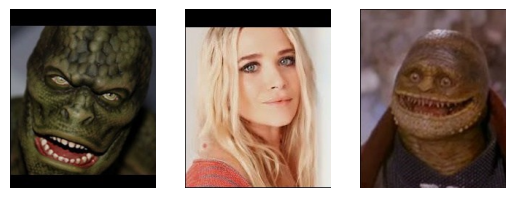

max cos_sim:  0.9234589338302612


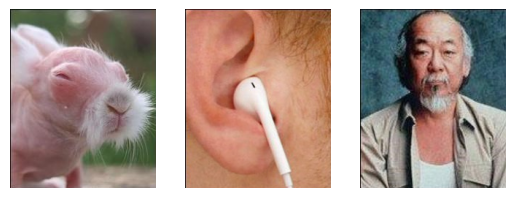

In [334]:
for i, data in enumerate(train_loader):
    if i<2:
        a, b, c = data
        a = a.type(torch.float32)
        b = b.type(torch.float32)
        # calculate cosine similarity
        cos_sim = np.array([F.cosine_similarity(a.reshape(1, -1), d.reshape(1, -1)).item() for d in b[0]])
        print('max cos_sim: ', np.max(cos_sim))
        # Show side by side a and the argmax of cos_sim
        plt.subplot(1, 3, 1)
        plt.imshow(a.squeeze().numpy()/255.)
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(b[0][np.argmax(cos_sim)].squeeze().numpy()/255.)
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(b[0][np.argmax(c)].squeeze().numpy()/255.)
        plt.axis('off')
        plt.show()
    else: 
        break

# 1. Feature Extraction

#### Clip ResNet 50x4

In [ ]:
# !conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
# !pip install ftfy regex tqdm
# !pip install git+https://github.com/openai/CLIP.git
# !pip install torch

In [96]:
from torchvision.models import resnet50, ResNet50_Weights

# New weights with accuracy 80.858%
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

In [115]:
from clip import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, transform = clip.load("RN50x4", device)

cpu
